#  Titanic Survival Prediction Using Machine Learning 

## Key Features
#### 1 . Handles missing data (e.g., Age and Embarked)
#### 2 . Encodes categorical features (Sex, Embarked)
#### 3 . Normalizes numerical features (Age, Fare)
#### 4 . Uses a Random Forest Classifier for prediction
#### 5 . Evaluates model performance with:
#### 6 . Accuracy,Precision,Recall,F1 Score,Confusion Matrix
#### 7 . Visualizes feature importance and key relationships
#### 8 . Modular and easy to extend with other models or deployment tools


# Importing Libraries 

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data

In [57]:
train_data = pd.read_csv("train.csv")
test = pd.read_csv("tested.csv")

# EDA

In [58]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
df_num = train_data[["Age", "SibSp", "Parch", "Fare"]]
df_cat = train_data[["Survived", "Sex", "Cabin", "Embarked", "Ticket"]]

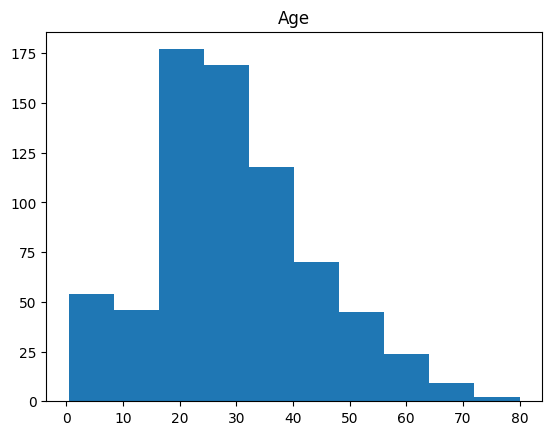

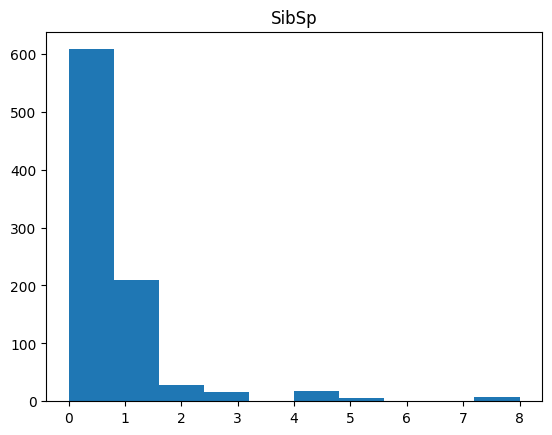

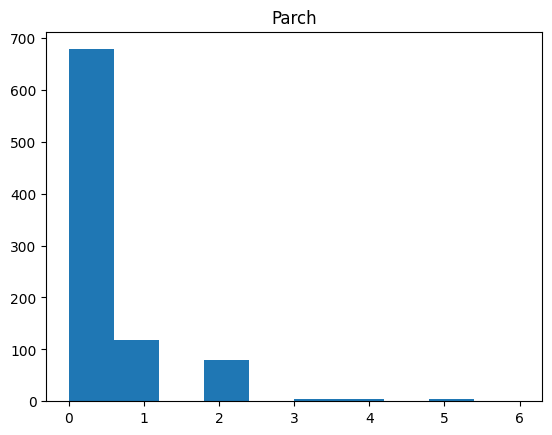

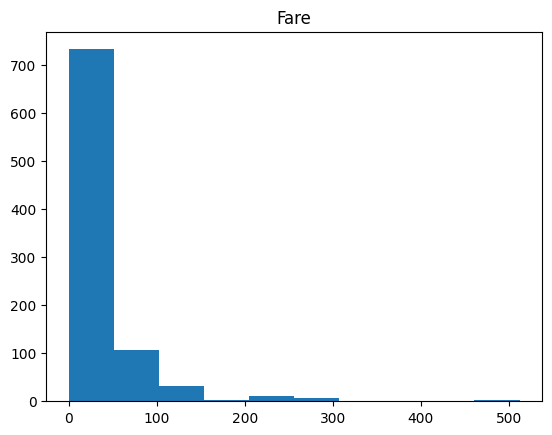

In [60]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

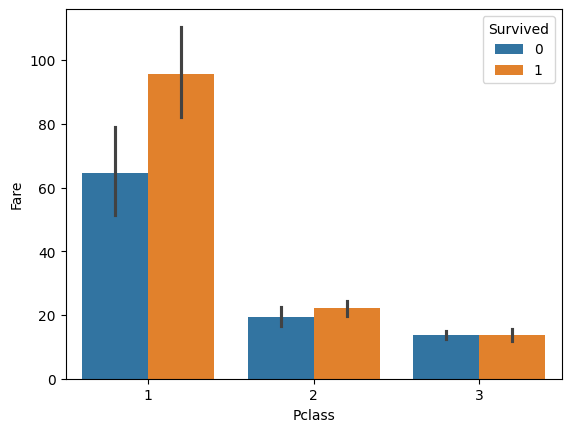

In [61]:
sns.barplot(data=train_data, x="Pclass", y="Fare", hue="Survived")

In [62]:
pd.pivot_table(train_data, index="Survived", values=["Age", "SibSp", "Parch", "Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


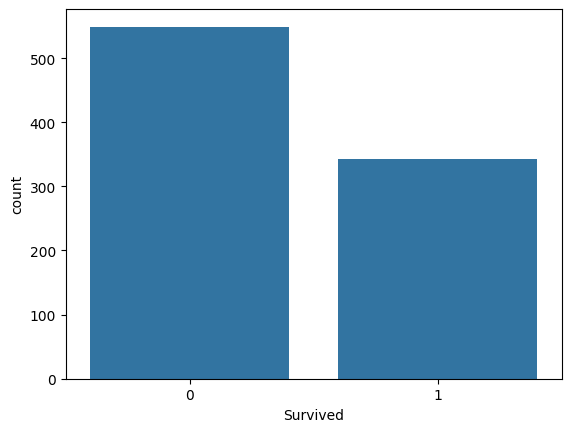

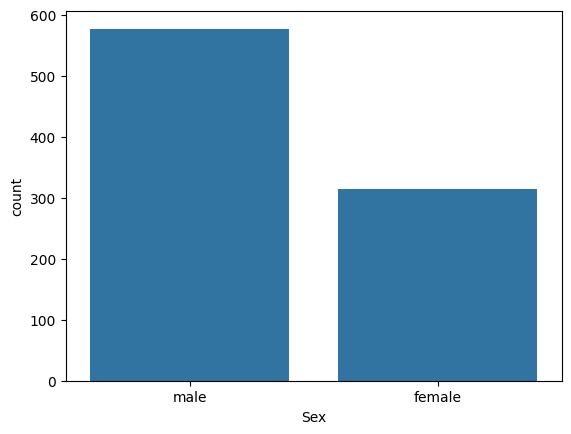

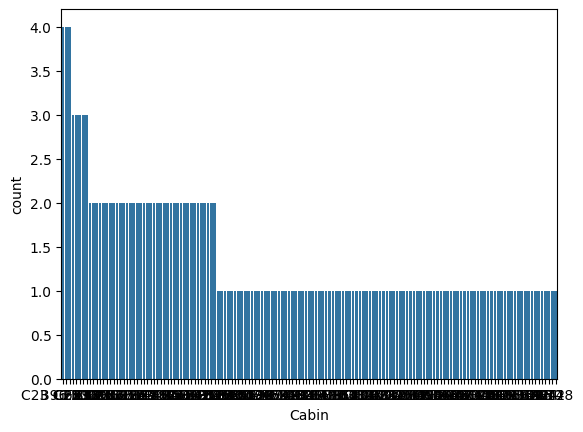

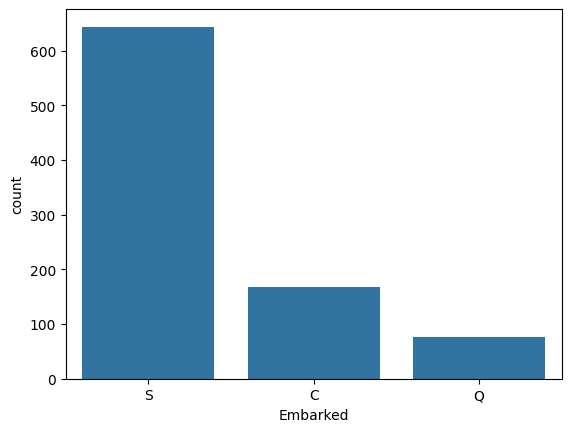

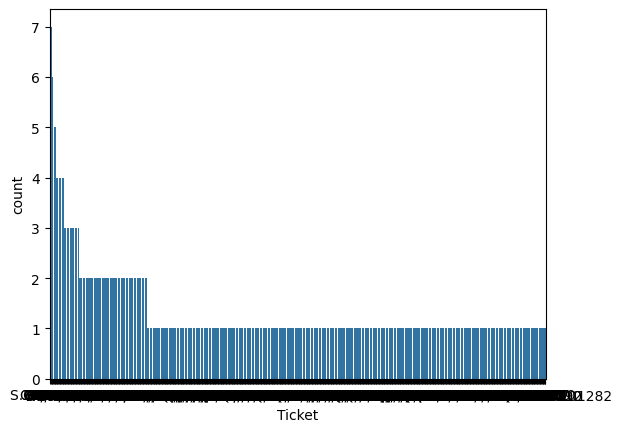

In [63]:
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts())
    plt.show()

In [66]:
x = pd.DataFrame(( pd.pivot_table(train_data,index="Survived",columns="Sex",values="Ticket",aggfunc="count",)))
print(pd.pivot_table(train_data, index="Survived", columns="Pclass", values="Ticket", aggfunc="count"))
print(pd.pivot_table(train_data,index="Survived",columns="Embarked",values="Ticket",aggfunc="count", ))
x

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


Sex,female,male
Survived,,
0,81,468
1,233,109


# Data Cleaning  

In [65]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handle Missing Value

In [12]:
train_data = train_data.drop(columns=["PassengerId", "Cabin", "Name", "Ticket"])

In [13]:
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())

In [14]:
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])

In [15]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Feature Enginneering 

In [16]:
train_data["Fare"] = np.log(train_data["Fare"] + 1)

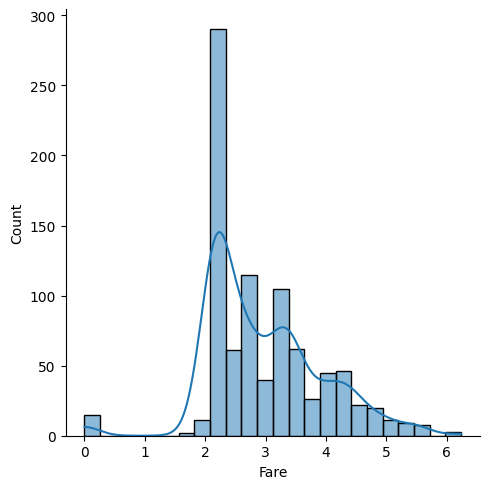

In [17]:
sns.displot(train_data["Fare"], kde=True)

<Axes: >

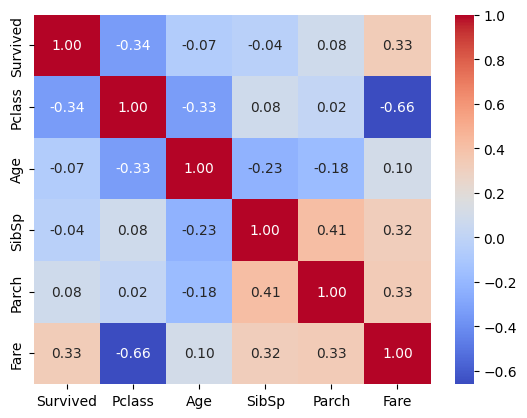

In [18]:
corr = train_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

In [19]:
from sklearn.preprocessing import LabelEncoder

cols = ["Sex", "Embarked"]
le = LabelEncoder()
for col in cols:
    train_data[col] = le.fit_transform(train_data[col])

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,2.110213,2
1,1,1,0,38.0,1,0,4.280593,0
2,1,3,0,26.0,0,0,2.188856,2
3,1,1,0,35.0,1,0,3.990834,2
4,0,3,1,35.0,0,0,2.202765,2


In [20]:
X = train_data.drop(columns=["Survived"], axis=1)
y = train_data["Survived"]
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,2.110213,2
1,1,1,0,38.000000,1,0,4.280593,0
2,1,3,0,26.000000,0,0,2.188856,2
3,1,1,0,35.000000,1,0,3.990834,2
4,0,3,1,35.000000,0,0,2.202765,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,2.639057,2
887,1,1,0,19.000000,0,0,3.433987,2
888,0,3,0,29.699118,1,2,3.196630,2
889,1,1,1,26.000000,0,0,3.433987,0


# Model Testing

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score


def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=40
    )
    model.fit(x_train, y_train)
    print("Accuracy", model.score(x_test, y_test))

    score = cross_val_score(model, X, y, cv=5)
    print("CV SCORE :", np.mean(score))

In [22]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
classify(model)

Accuracy 0.7713004484304933
CV SCORE : 0.7621053292323143


In [23]:
from xgboost import XGBClassifier

model = XGBClassifier()
classify(model)

Accuracy 0.7937219730941704
CV SCORE : 0.8159751428033394


In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
classify(model)

Accuracy 0.7982062780269058
CV SCORE : 0.8092524009792228


In [25]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
classify(model)

Accuracy 0.7937219730941704
CV SCORE : 0.7980101688531793


In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
classify(model)

Accuracy 0.8116591928251121
CV SCORE : 0.7833971502102819


In [35]:
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [36]:
X_test = test.drop(columns=["PassengerId", "Name", "Cabin", "Ticket"], axis=1)

X_test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [37]:
from sklearn.preprocessing import LabelEncoder

cols = ["Sex", "Embarked"]
le = LabelEncoder()

for col in cols:
    X_test[col] = le.fit_transform(X_test[col])

X_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


In [38]:
X_test["Age"] = X_test["Age"].fillna(X_test["Age"].mean())
X_test["Fare"] = X_test["Fare"].fillna(X_test["Fare"].mean())

X_test.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Data Preprocessing

In [39]:
X_test = test.drop(columns=["PassengerId", "Name", "Cabin", "Ticket"], axis=1)

X_test["Age"] = X_test["Age"].fillna(X_test["Age"].mean())
X_test["Fare"] = X_test["Fare"].fillna(X_test["Fare"].mean())

X_test.isnull().sum()

from sklearn.preprocessing import LabelEncoder

cols = ["Sex", "Embarked"]
le = LabelEncoder()

for col in cols:
    X_test[col] = le.fit_transform(X_test[col])

X_test.head()
X_test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.50000,0,0,7.8292,1
1,1,3,0,47.00000,1,0,7.0000,2
2,0,2,1,62.00000,0,0,9.6875,1
3,0,3,1,27.00000,0,0,8.6625,2
4,1,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,0,3,1,30.27259,0,0,8.0500,2
414,1,1,0,39.00000,0,0,108.9000,0
415,0,3,1,38.50000,0,0,7.2500,2
416,0,3,1,30.27259,0,0,8.0500,2


# Test Submission 

In [45]:
final_data = pd.read_csv("titanic_submission.csv")
final_datafinal_data.info()

,PassengerId,Survived
0,892,1
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [46]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


# The Accuracy of the Model is 69.8%